# Understanding How In-Visualization Provenance Can Support Trade-off Analysis
Mehdi Chakhchoukh

## Table of content: <a class="anchor" id="TOC"></a>

* [Introduction](#Introduction)
* [Dependencies and technical notes](#Dependencies_and_technical_notes)
* [Importing libraries](#Importing_libraries)
* [Importing data](#Importing_data)
* [Functions and prep work](#Functions_and_prep_work)
* [Extracting each column & basic graphs (paper section 4.3)](#Extracting_each_column_&_basic_graphs)
* [Provenance goals and objects (paper section 5.1)](#Provenance)
* [Trade Off tasks (paper section 5.2)](#Trade_Off_tasks)
* [Provenance Tool use in analysis (paper section 5.3)](#Tool_use)
* [Opportunities for provenance visualization (paper section 5.4)](#Opportunities_for_provenance_visualization)

### Introduction <a class="anchor" id="Introduction"></a>

This notebook is a collection of visualizations and graphs of our dataset. This dataset consists of events we coded from 3 different recordings of experiments with expert users conducted on our tool Visprom.

This notebook is intended as complementary material for our paper. It is based specifically on the results section (from 5 to 5.4.4). Since this notebook follows the general content of the results section, we highly advise consulting this document along with the paper for more details.

The exploration starts from the section [Extracting each collumn & basic graphs](#Extracting_each_collumn_&_basic_graphs); thus, you can skip reading all previous sections as they are declarations of functions and general preparation work for the exploration.

#### About the data:

The dataset consists of 178 events coded from 324 minutes of videos of experts exploring their data. Events are identified as provenance and/or trade-off analysis-related. For each event, we take into account 9 key dimensions:

- 1 Use_Case (CS-eco,CS-ml,CS-w)
- 2 Opportunity (or tool use or trade-off)
- 3 Provenance (analytical provenance, data provenance, or non provenance events ) 
- 4 Observed (or promped or reported)
- 5 Provenance category by Ragan et al. (provenance goals)
- 6 Tool (provenance tool used during the event)
- 7 Code_P1 (Provenance Objects)
- 8 Code_P2 (Provenance Objects - further details for the objects)
- 9 Exp_Part (experiment parts: 'Reproduce Insight WoL','Reproduce Insight WL','Open Explore','Discussion' )


### Dependencies and technical notes <a class="anchor" id="Dependencies_and_technical_notes"></a>

* [Back to the TOC](#TOC)

This code runs under python 3.7.1 and uses openpyxl v2.6
> In case you encounter the following error : "TypeError: iter_rows() got an unexpected keyword argument 'values_only'" please update your openpyxl version with the command "pip install -U openpyxl"

### Importing libraries <a class="anchor" id="Importing_libraries"></a>

* [Back to the TOC](#TOC)

In [1]:
import openpyxl
from openpyxl import Workbook
from openpyxl import load_workbook
from openpyxl.styles import Color, PatternFill, Font, Border
from openpyxl.styles import colors
from openpyxl.cell import Cell

from collections import Counter
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd



### Importing data <a class="anchor" id="Importing_data"></a>

* [Back to the TOC](#TOC)

In [2]:
fname="AnalysisDataCorpus.xlsx"

workbook = load_workbook(filename=fname)
workbook.sheetnames
sheet = workbook.active



### Functions and prep work <a class="anchor" id="Functions_and_prep_work"></a>

* [Back to the TOC](#TOC)

In [3]:
def returnCol (sheet, col):
    arr = []
    for v in sheet.iter_rows(min_row=2,
                             max_row=180,
                                 min_col=col,
                                 max_col=col,values_only=True):
        arr.append(v[0])
    return arr


In [4]:
num = {
    "a":1,
    "b":2,
    "c":3,
    "d":4,
    "e":5,
    "f":6,
    "g":7,
    "h":8,
    "i":9,
    "j":10,
    "k":11,
    "l":12,
    "m":13,
    "n":14,
    "o":15,
    "p":16,
    "q":17,
    "r":18,
    "s":19,
    "t":20,
    "u":21,
    "v":22,
    "w":23,
    "x":24,
    "y":25,
    "z":26,
    "aa":27,
    "ab":28,
    "ac":29}


In [5]:
#Function to filter the data

def returnCol_filter (sheet, col, provbool, toffbool, oppbool, toolbool):
    arr = []
    ids = []
    for v in sheet.iter_rows(min_row=2,
                             max_row=179,
                             values_only=True):
        if v[0] in [85,121]:
            continue
            
        #Provenance Check
        if  (provbool==0 ):
            if( (v[20] == "A_Provenance" or v[20] == "D_Provenance") ):
                continue
                
        elif(provbool==1 ):
            if( (v[20] != "A_Provenance" and v[20] != "D_Provenance") ):
                continue
        
         
                
        if  (toffbool==0):
            if( (v[20] == "Trade-off")):
                continue
        elif(toffbool==1 ):
            if( (v[20] != "Trade-off")):
                continue
                
        if (oppbool==0 ):
            if( (v[19] == "Opportunity" or v[19] == "Opportunity-new" )):
                continue
        elif(oppbool==1 ):
            if( (v[19] != "Opportunity" and v[19] != "Opportunity-new")):
                continue
                
        if (toolbool==0 ):
            if(v[20] == "Tool Use"):
                continue
        elif(toolbool == 1 ):
            if( v[20] != "Tool Use"):
                continue
                
        arr.append(v[col-1])
        ids.append(v[0])
        
                
    return ids , arr


In [6]:
#Function used in the making of the graphs
def counter_to_bars (counter, dim1, dim2) :
    res = []
    labely = []
    
    for idx2, val2 in enumerate(dim2):
        res.append([])
        if val2 == None:
            labely.append("None")
        else:
            labely.append(val2)
        labelx = []
        for idx1, val1 in enumerate(dim1):
            res[idx2].append(counter[(val1,val2)])
            
            if val1 == None:
                labelx.append("None")
            else:
                labelx.append(val1)
            
            
    return res , labelx, labely


In [7]:
#Colors
palette =  ["#c8ac58",
"#704ac1",
"#8ad152",
"#cb54af",
"#85caaa",
"#cf5b34",
"#9a9cc4",
"#515d3a",
"#ad5059",
"#4a3154",
"#75e542",
"#5839cf",
"#a1dc85",
"#a73fd2",
"#dbdf44",
"#5b6de4",
"#9bac38",
"#b874dd",
"#4c8f32",
"#df44cf",
"#63dea0",
"#d73750",
"#65e2d5",
"#df3b28",
"#76c4d9",
"#de9531",
"#6a89dd",
"#827427",
"#411d86",
"#d8e499",
"#842e88",
"#4dd263",
"#dc3d82",
"#92a56e",
"#331a53",
"#c6ddcb",
"#4d1a26",
"#e0bf95",
"#514c9c",
"#35571e",
"#d49ce0",
"#419062",
"#e57980",
"#59a2d6",
"#812b21",
"#d7c6e0",
"#8e5625",
"#4a5e8e",
"#d68a65",
"#232435",
"#da81aa",
"#1f3929",
"#d2a3a2",
"#4a341f",
"#5d928b",
"#8a2b5a",
"#988164",
"#936397",
"#436775",
"#815e67"]



In [8]:
#Possible values in all the dimensions
values = set([
'CS-eco',
'CS-ml', 
'CS-w',
'Opportunity', 
'Trade-off', 
'Tool Use',
'D_Provenance', 
'Trade-off', 
'A_Provenance', 
'Tool Use',
'-', 
None, 
'Prompted', 
'Reported', 
'Observed',
'Recall', 
'-', 
'Meta-Analysis', 
'Presentation', 
'Replication', 
'Action Recovery',
'None', 'Dim Count', 
'View Count', 
'Favorites', 
'Query-Color Queries', 
'Min/Max', 
'SelectionRange (Min/Max)', 
'Query-Label', 'GENERAL - Load past history (in particular the Combined Dimensions that were interested in)', 
'GENERAL - Load past history (favorable view of past exploration)', 
'Query-SIZE', 
'Query-Group Origin', 
'History', 
'GENERAL - Load past history',
'Data semantics & origin', 
'Find clusters, correlations & outliers', 
'Focus & priority', 
'Exploration structure & steps', 
'Verification & validation', 
'Exploration  approach', 
'Interest  zones', 
'Locate & characterize', 
'Combine interest zones & dimensions', 
'Coverage', 'Minimize & maximize', 
'Coverage ', 
'Observe coverage', 
'Create branches & compare alternatives', 
'Cascade & refine', 'Rank & prioritize', 
'Annotation',
'Reproduce Insight WoL', 
'Reproduce Insight WL', 
'Open Explore', 
'Discussion'])

Codes2 = [None, 'Semantics of dimensions', 'Semantics of a value', 'Level 2 : Remind focus', 'Level 1 : Steps', 'Level 2 : Important dimension (Trade-off)', 'Level 2: phases / scenario', 'Missing Reasoning (why)', 'Reflect Positive / Missing Reasoning (why)', 'Level 2 : Interesting view', 'Reflect Why', 'Level 2: Size of trade off set', 'Level 1 : One dimension / objective', 'Combined Dimensions', 'Level 2: Interesting view', 'Level 2: Distribution of data', 'Semantics of value', 'Level 1: Threshold, Range, Boundary', 'Combine dimensions', 'Level 2: Combined dim relationship', 'Level 1: Keep track of questions/hypothesis/todo', 'Level 2: Interesting pattern OR Unexplored ranges (related to thresholds or interesting patterns)', 'Semantics of selection', 'Level 1: Keep track of name', 'Level 2: keep track of data dimension coverage (two or more)', 'Level 2 : Prioritising', 'Level 1: keep track  of a specific  data dimension (one)', 'Level 1: Range', 'Level 2: Bisector', 'Level 2 : Most interesting plots visited', 'Level 2: strategy for Min/Max two or more dimensions', 'Level 2: Selection', 'Branching/alternative/refine', 'Level 2 : Selection for Min/Max one objective', 'Level 2: Dataset size', 'Compare alternatives', 'Cascade & Refine', 'Level 2 : Frequency of visits', 'Level 2 : Combined dimension', 'Combine Dimensions', 'Compare Alternatives', 'Level 2 : Size of Trade-off Set', 'Semantics of Dimension', 'Rank Solutions', 'Level 2: Selection for Min/Max two or more dimensions', 'Create Selection', 'Level 1 : Range', 'Reflect Positive', 'Reflect Negative', 'Level 2 : Selection', 'Level 1 : Selection for Min/Max one objective', 'Level 2 : Distribution', 'Level 2 : Multiple criteria', 'Level 1 : Selection', 'Level 2 : Interesting Views', 'Level 2 : keep track of data files coverage', 'Level 2 : Winning solutions']



In [9]:
#Dictionary of values:colors
colorOf = {}
for i, v in enumerate(values):
    colorOf[v] = palette[i]
    
for i, v in enumerate(Codes2):
    if v not in colorOf:
        colorOf[v] = palette[i]



In [10]:
#On dimention graph
def one_bar_color_bargraph(maindim,title, printPourcentages):
    
    sub =[]
    for idx, val in enumerate(maindim):
            sub.append(("",maindim[idx]))

    t = Counter(maindim)
    colp ={}
    
    w = Counter(sub)
    #for key in w:
        
        #colp[key]= w[key]* (100/t[key[0]])
        #colp[key] = round(colp[key], 2)
        
        #w[key] *=  100/len(maindim)
        #w[key] = round(w[key], 2)
    
    
    b , lblx, lbly = counter_to_bars( w , {'': len(maindim)} , Counter(maindim) )
    if (printPourcentages):
        print("=================")
        print("=================")
        for idx, val in enumerate(b):
            for idx2, val2 in enumerate(val):
                print(lbly[idx] , val2 ,"events or", format(val2*100/len(maindim), '.2f'), "% of total ",len(maindim)," events" )
    

    # y-axis in b$*ld
    rc('font', weight='bold')

    # Values of each group
    #print(b, lblx, lbly )

    # The position of the bars on the x-axis
    r = range(len(lblx))

    # Names of group and bar width
    names = lblx
    barWidth = 1

    bars = b[0]
    drawnbars = []
    # Create bars
    for idx1, val1 in enumerate(lbly):
        #print(idx1)
        if idx1 == 0:
            drawnbars.append(plt.bar(r, b[idx1], color= colorOf[val1], edgecolor='white', width=barWidth))
        else:
            drawnbars.append(plt.bar(r, b[idx1], bottom= bars , color= colorOf[val1], edgecolor='white', width=barWidth))
            bars = np.add(bars, b[idx1]).tolist()

    # Custom X axis
    plt.xticks(r, names, fontweight='bold')
    plt.xticks(range(len(lblx)), rotation='vertical')
    plt.xlabel(title)
    plt.ylabel("Number of events (out of "+str(len(maindim))+" total events)")
    plt.legend(tuple(drawnbars), tuple(lbly),bbox_to_anchor=(1.05, 1), loc='upper left')
    # Show graphic

    plt.show()



In [11]:
#Bar graph with two dimentions: one on the x axis and the other with the colors
def color_bargraph(maindim,colordim,title,printPourcentages,order):
    
    sub =[]
    for idx, val in enumerate(maindim):
            sub.append((maindim[idx],colordim[idx]))

    t = Counter(maindim)
    colp ={}
    
    w = Counter(sub)
    
    b , lblx, lbly = counter_to_bars( w , Counter(maindim) , Counter(colordim) )
    
    
    #Ordering the columns if user input
    if order != None :
        newb = []
        for e in lbly:
            newb.append([])
            
        for i, e in enumerate(order):
            for j, lbl in enumerate(lblx):
                if e == lbl:
                    for k, arr in enumerate(b):
                        newb[k].append(b[k][j])
        b = newb
        lblx = order

    # y-axis in bold
    rc('font', weight='bold')

    # Values of each group
    #print(b, lblx, lbly )

    # The position of the bars on the x-axis
    r = range(len(lblx))

    # Names of group and bar width
    names = lblx
    barWidth = 1

    #Making the bargrah
    bars = b[0]
    drawnbars = []
    for idx1, val1 in enumerate(lbly):
        if idx1 == 0:
            drawnbars.append(plt.bar(r, b[idx1], color= colorOf[val1], edgecolor='white', width=barWidth))
        else:
            drawnbars.append(plt.bar(r, b[idx1], bottom= bars , color= colorOf[val1], edgecolor='white', width=barWidth))
            bars = np.add(bars, b[idx1]).tolist()

    # Labels and Legend
    plt.xticks(r, names, fontweight='bold')
    plt.xticks(range(len(lblx)), rotation='vertical')
    plt.xlabel(title)
    plt.ylabel("Number of events (out of "+str(len(maindim))+" total events)")
    plt.legend(tuple(drawnbars), tuple(lbly),bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Show graphic
    plt.show()
    
    #Printing the pourcentages
    if (printPourcentages):
        for key in w:
            print(w[key],"events or ",format(w[key]*100/t[key[0]], '.2f'),"% of ",key[0],t[key[0]],"total events is ",key[1])
        print("=================")
        print("=================")

        
##Defining constants    
print_true = True
print_false = False
order_none = None
order_ExpPart = ['Reproduce Insight WoL','Reproduce Insight WL','Open Explore','Discussion']


In [12]:
def find(value,col,ids):
    res = []
    for idx, val  in enumerate(col):
        if val == value:
            res.append(ids[idx])
    return res



In [13]:
#Function to aggregate values before plotting: all values in listoOfValues will be replaced by finalValue
def aggregate (dataset, colorOf, listOfValues, finalValue):
    colorOf[finalValue] = colorOf[listOfValues[0]]
    for idx, event in enumerate(dataset):
        for value in listOfValues:
            if event == value:
                dataset[idx] = finalValue
                


In [14]:
def filter(provenance_filter,TradeOff_filter,Opportunities_filter,ToolUse_filter,
        Use_Case ,Opportunity,Provenance ,Observed,Ragan,Tool ,Code_P1 ,Code_P2 ,Exp_Part,ids ):

    ids ,Use_Case = returnCol_filter (sheet, num["b"], provenance_filter,TradeOff_filter,Opportunities_filter,ToolUse_filter )
    ids ,Opportunity = returnCol_filter (sheet, num["t"], provenance_filter,TradeOff_filter,Opportunities_filter,ToolUse_filter )
    ids ,Provenance= returnCol_filter (sheet, num["u"], provenance_filter,TradeOff_filter,Opportunities_filter,ToolUse_filter )
    ids ,Observed = returnCol_filter (sheet, num["v"], provenance_filter,TradeOff_filter,Opportunities_filter,ToolUse_filter )
    ids ,Ragan = returnCol_filter (sheet, num["w"], provenance_filter,TradeOff_filter,Opportunities_filter,ToolUse_filter )
    ids ,Tool = returnCol_filter (sheet, num["x"], provenance_filter,TradeOff_filter,Opportunities_filter,ToolUse_filter )
    ids ,Code_P1 = returnCol_filter (sheet, num["y"], provenance_filter,TradeOff_filter,Opportunities_filter,ToolUse_filter )
    ids ,Code_P2 = returnCol_filter (sheet, num["z"], provenance_filter,TradeOff_filter,Opportunities_filter,ToolUse_filter )
    ids ,Exp_Part =returnCol_filter (sheet, num["aa"], provenance_filter,TradeOff_filter,Opportunities_filter,ToolUse_filter)
    
    return (Use_Case ,Opportunity,Provenance ,Observed,Ragan,Tool ,Code_P1 ,Code_P2 ,Exp_Part,ids)
    
Use_Case = []
Opportunity = []
Provenance= []
Observed = []
Ragan = []
Tool = []
Code_P1 = []
Code_P2 = []
Exp_Part =[]
ids = []



### Extracting each column & basic graphs (paper section 4.3)  <a class="anchor" id="Extracting_each_column_&_basic_graphs"></a>

* [Back to the TOC](#TOC)

In this notebook, there are 2 main graphing functions:

color_bargraph(Xaxis_Dimension,color_Dimension,"Title of the graph",print_false, order_none)
one_bar_color_bargraph(color_Dimension,"Title of the graph",print_false)

If you replace print_false with print_true the function will also print in text percentages of the different sections drawn.

If you replace order_none with an array of values, the bars on the Xaxis will be sorted in the provided order. (We also provide the array order_ExpPart to order the bars in the chronological order when the Xaxis dimensions is Exp_Part).

Before creating a graph it is best to run the filtering section:


you can also aggregate values after the filtering with the function: 

Where colorOf is a dictionary of colors declared in first cells of notebook

In [32]:
## 0 = must NOT include
## 1 = must include
## 2 = we don not care either way

provenance_filter = 2
TradeOff_filter = 2
Opportunities_filter = 2
ToolUse_filter = 2

Use_Case ,Opportunity,Provenance ,Observed,Ragan,Tool ,Code_P1 ,Code_P2 ,Exp_Part,ids  = filter( provenance_filter,TradeOff_filter,Opportunities_filter,ToolUse_filter, Use_Case ,Opportunity,Provenance ,Observed,Ragan,Tool ,Code_P1 ,Code_P2 ,Exp_Part,ids )

CS-eco 46 events or 25.84 % of total  178  events
CS-ml 62 events or 34.83 % of total  178  events
CS-w 70 events or 39.33 % of total  178  events


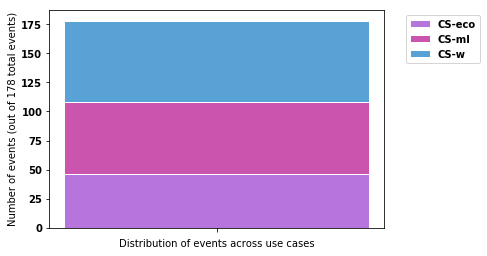

- 71 events or 39.89 % of total  178  events
None 40 events or 22.47 % of total  178  events
Prompted 10 events or 5.62 % of total  178  events
Reported 40 events or 22.47 % of total  178  events
Observed 17 events or 9.55 % of total  178  events


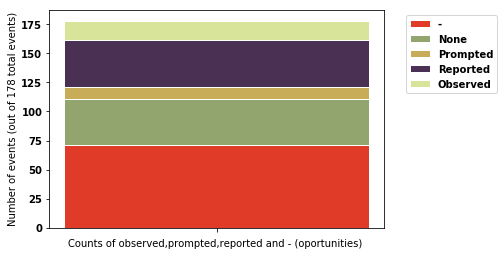

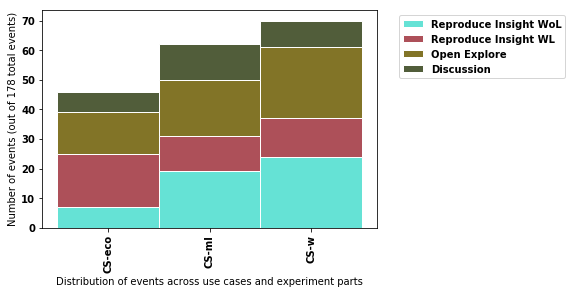

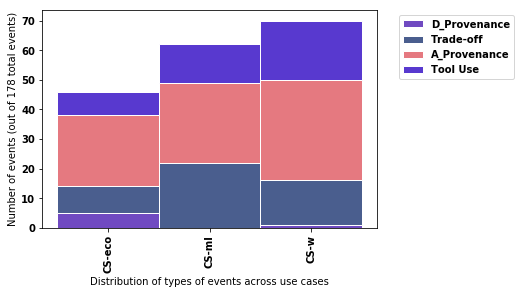

In [33]:
one_bar_color_bargraph(Use_Case,"Distribution of events across use cases",print_true)
one_bar_color_bargraph(Observed,"Counts of observed,prompted,reported and - (oportunities) ",print_true)
color_bargraph(Use_Case,Exp_Part, "Distribution of events across use cases and experiment parts",print_false, order_none)#In paper 4.3 Data Collection and Video Coding 
color_bargraph(Use_Case,Provenance, "Distribution of types of events across use cases",print_false, order_none)#In paper 4.3 Data Collection and Video Coding 

# Provenance Goals & Objects (paper section 5.1) <a class="anchor" id="Provenance"></a>

* [Back to the TOC](#TOC)

In [34]:
## 0 = must NOT include
## 1 = must include
## 2 = we dont care either way

provenance_filter = 2
TradeOff_filter = 0
Opportunities_filter = 2
ToolUse_filter = 2

Use_Case ,Opportunity,Provenance ,Observed,Ragan,Tool ,Code_P1 ,Code_P2 ,Exp_Part,ids  = filter( provenance_filter,TradeOff_filter,Opportunities_filter,ToolUse_filter, Use_Case ,Opportunity,Provenance ,Observed,Ragan,Tool ,Code_P1 ,Code_P2 ,Exp_Part,ids )

CS-eco 37 events or 28.03 % of total  132  events
CS-ml 40 events or 30.30 % of total  132  events
CS-w 55 events or 41.67 % of total  132  events


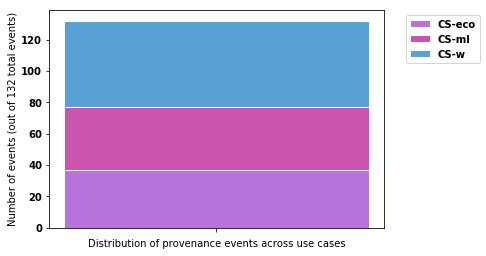

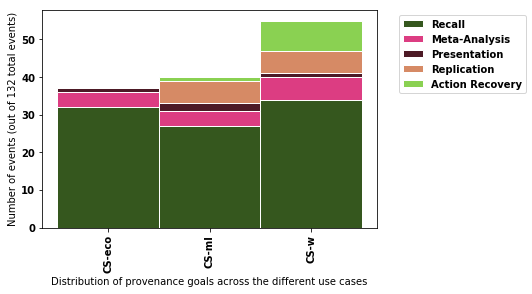

In [35]:
#color_bargraph(Ragan,Observed,"Origin of provenance events across provenance goals",print_false, order_none) #In paper 5.1    Refined Provenance Goals and Objects
one_bar_color_bargraph(Use_Case,"Distribution of provenance events across use cases",print_true)
color_bargraph(Use_Case,Ragan, "Distribution of provenance goals across the different use cases",print_false, order_none) #In paper 5.1    Refined Provenance Goals and Objects


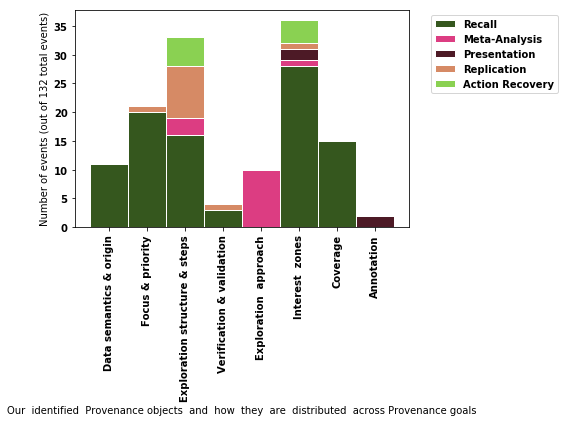

11 events or  100.00 % of  Data semantics & origin 11 total events is  Recall
20 events or  95.24 % of  Focus & priority 21 total events is  Recall
16 events or  48.48 % of  Exploration structure & steps 33 total events is  Recall
3 events or  75.00 % of  Verification & validation 4 total events is  Recall
10 events or  100.00 % of  Exploration  approach 10 total events is  Meta-Analysis
28 events or  77.78 % of  Interest  zones 36 total events is  Recall
2 events or  5.56 % of  Interest  zones 36 total events is  Presentation
15 events or  100.00 % of  Coverage 15 total events is  Recall
9 events or  27.27 % of  Exploration structure & steps 33 total events is  Replication
1 events or  4.76 % of  Focus & priority 21 total events is  Replication
1 events or  2.78 % of  Interest  zones 36 total events is  Replication
5 events or  15.15 % of  Exploration structure & steps 33 total events is  Action Recovery
3 events or  9.09 % of  Exploration structure & steps 33 total events is  Meta-An

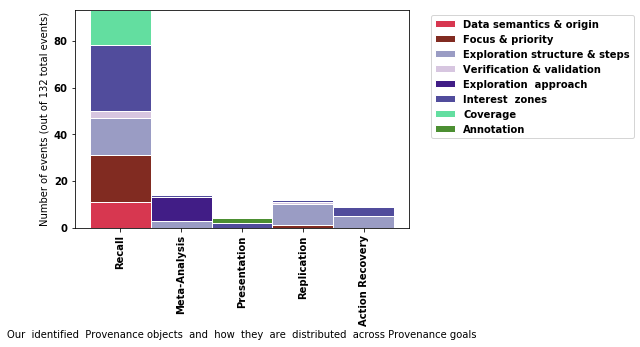

11 events or  11.83 % of  Recall 93 total events is  Data semantics & origin
20 events or  21.51 % of  Recall 93 total events is  Focus & priority
16 events or  17.20 % of  Recall 93 total events is  Exploration structure & steps
3 events or  3.23 % of  Recall 93 total events is  Verification & validation
10 events or  71.43 % of  Meta-Analysis 14 total events is  Exploration  approach
28 events or  30.11 % of  Recall 93 total events is  Interest  zones
2 events or  50.00 % of  Presentation 4 total events is  Interest  zones
15 events or  16.13 % of  Recall 93 total events is  Coverage
9 events or  75.00 % of  Replication 12 total events is  Exploration structure & steps
1 events or  8.33 % of  Replication 12 total events is  Focus & priority
1 events or  8.33 % of  Replication 12 total events is  Interest  zones
5 events or  55.56 % of  Action Recovery 9 total events is  Exploration structure & steps
3 events or  21.43 % of  Meta-Analysis 14 total events is  Exploration structure & st

In [36]:
#5.1 Refined Provenance Goals & Objects
# Number list
color_bargraph(Code_P1,Ragan,"Our  identified  Provenance objects  and  how  they  are  distributed  across Provenance goals",print_true, order_none) # In Paper #5.1    Refined Provenance Goals & Objects
color_bargraph(Ragan,Code_P1,"Our  identified  Provenance objects  and  how  they  are  distributed  across Provenance goals",print_true, order_none) # Extra (mirror of previous graph)

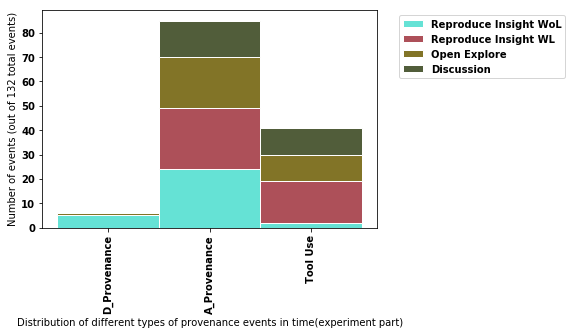

In [37]:
color_bargraph(Provenance,Exp_Part,"Distribution of different types of provenance events in time(experiment part)",print_false, order_none)# Extra

# Trade Off tasks (paper section 5.2) <a class="anchor" id="Trade_Off_tasks"></a>

* [Back to the TOC](#TOC)

In [38]:
## 0 = must NOT include
## 1 = must include
## 2 = we dont care either way

provenance_filter = 2
TradeOff_filter = 1
Opportunities_filter = 2
ToolUse_filter = 2

Use_Case ,Opportunity,Provenance ,Observed,Ragan,Tool ,Code_P1 ,Code_P2 ,Exp_Part,ids  = filter( provenance_filter,TradeOff_filter,Opportunities_filter,ToolUse_filter, Use_Case ,Opportunity,Provenance ,Observed,Ragan,Tool ,Code_P1 ,Code_P2 ,Exp_Part,ids )

CS-eco 9 events or 19.57 % of total  46  events
CS-ml 22 events or 47.83 % of total  46  events
CS-w 15 events or 32.61 % of total  46  events


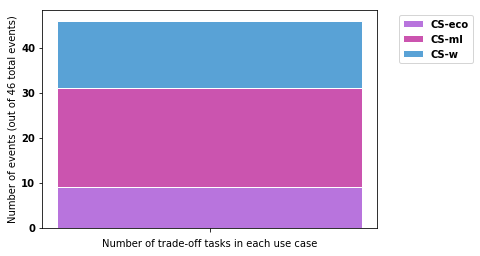

Reproduce Insight WoL 19 events or 41.30 % of total  46  events
Open Explore 24 events or 52.17 % of total  46  events
Reproduce Insight WL 1 events or 2.17 % of total  46  events
Discussion 2 events or 4.35 % of total  46  events


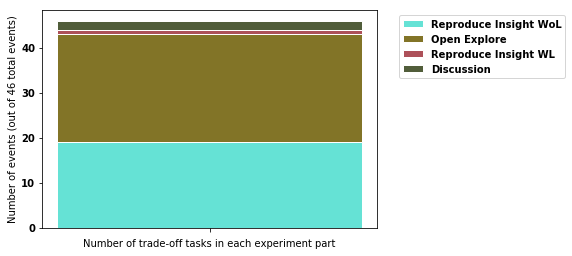

Find clusters, correlations & outliers 8 events or 17.39 % of total  46  events
Locate & characterize 13 events or 28.26 % of total  46  events
Combine interest zones & dimensions 5 events or 10.87 % of total  46  events
Minimize & maximize 3 events or 6.52 % of total  46  events
Observe coverage 2 events or 4.35 % of total  46  events
Create branches & compare alternatives 6 events or 13.04 % of total  46  events
Cascade & refine 7 events or 15.22 % of total  46  events
Rank & prioritize 2 events or 4.35 % of total  46  events


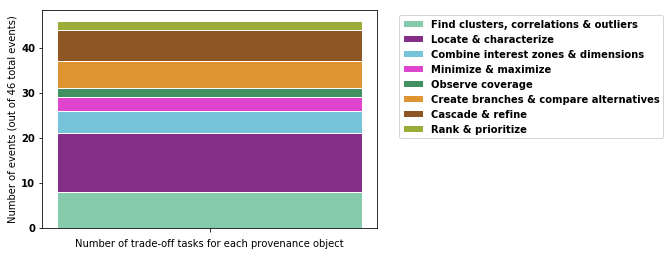

In [39]:
one_bar_color_bargraph(Use_Case,"Number of trade-off tasks in each use case",print_true) #In paper 5.2 Trade-off analysis tasks
one_bar_color_bargraph(Exp_Part,"Number of trade-off tasks in each experiment part",print_true) #In paper 5.2 Trade-off analysis tasks

one_bar_color_bargraph(Code_P1,"Number of trade-off tasks for each provenance object",print_true) #In paper task list 5.2 Trade-off analysis tasks

# Provenance tool use in analysis (paper section 5.3)<a class="anchor" id="Tool_use"></a>

* [Back to the TOC](#TOC)

In [40]:
## 0 = must NOT include
## 1 = must include
## 2 = we dont care either way

provenance_filter = 2
TradeOff_filter = 2
Opportunities_filter = 0
ToolUse_filter = 1

Use_Case ,Opportunity,Provenance ,Observed,Ragan,Tool ,Code_P1 ,Code_P2 ,Exp_Part,ids  = filter( provenance_filter,TradeOff_filter,Opportunities_filter,ToolUse_filter, Use_Case ,Opportunity,Provenance ,Observed,Ragan,Tool ,Code_P1 ,Code_P2 ,Exp_Part,ids )

if(1):  # Aggregation: 1== True | 0 == False
    aggregate(Tool,colorOf, 
          ['GENERAL - Load past history (in particular the Combined Dimensions that were interested in)',
           'GENERAL - Load past history (favorable view of past exploration)',
           'GENERAL - Load past history'], "General" )

    aggregate(Tool,colorOf,
              ['Query-Color Queries', 
               'Query-Label', 
               'Query-Group Origin','Query-SIZE'], "Query" )

CS-eco 8 events or 19.51 % of total  41  events
CS-ml 13 events or 31.71 % of total  41  events
CS-w 20 events or 48.78 % of total  41  events


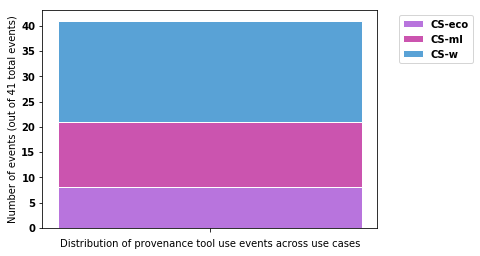

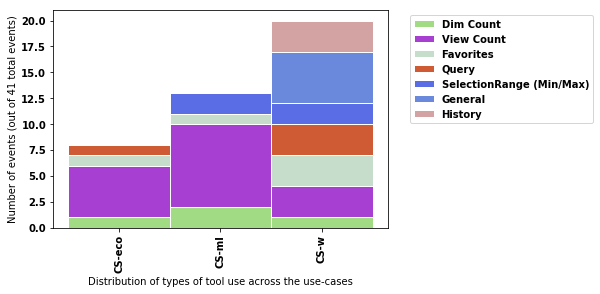

In [41]:
one_bar_color_bargraph(Use_Case,"Distribution of provenance tool use events across use cases",print_true)
color_bargraph(Use_Case,Tool,"Distribution of types of tool use across the use-cases",print_false, order_none) # In Paper 5.3 Provenance supports trade-off analysis
#None = No tool use

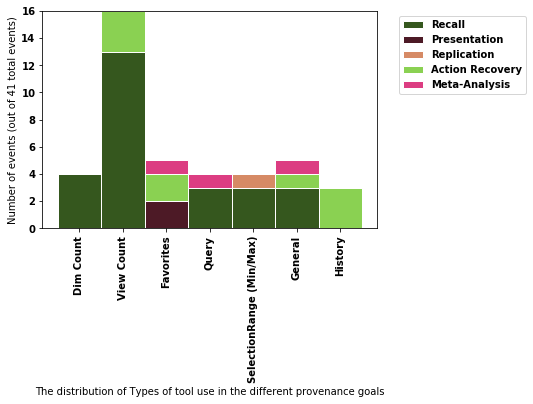

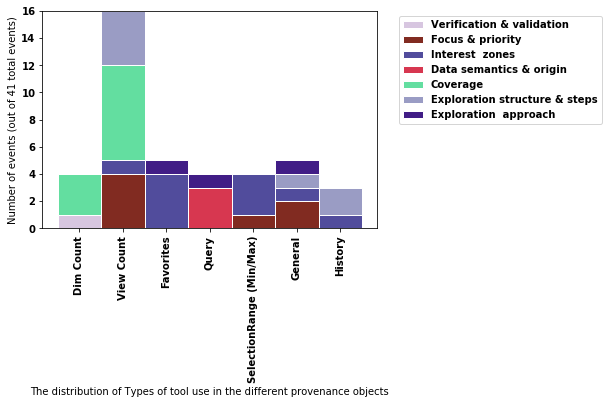

In [42]:
color_bargraph(Tool, Ragan,"The distribution of Types of tool use in the different provenance goals",print_false, order_none) # In paper 5.3.1 How provenance tools were utilized
color_bargraph(Tool, Code_P1,"The distribution of Types of tool use in the different provenance objects",print_false, order_none) # In paper 5.3.1 How provenance tools were utilized


Verification & validation 1 events or 2.44 % of total  41  events
Focus & priority 7 events or 17.07 % of total  41  events
Interest  zones 10 events or 24.39 % of total  41  events
Data semantics & origin 3 events or 7.32 % of total  41  events
Coverage 10 events or 24.39 % of total  41  events
Exploration structure & steps 7 events or 17.07 % of total  41  events
Exploration  approach 3 events or 7.32 % of total  41  events


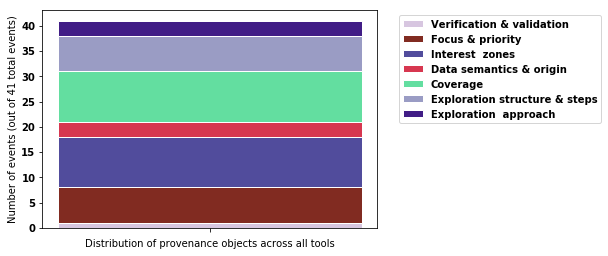

In [43]:
one_bar_color_bargraph(Code_P1,"Distribution of provenance objects across all tools",print_true)

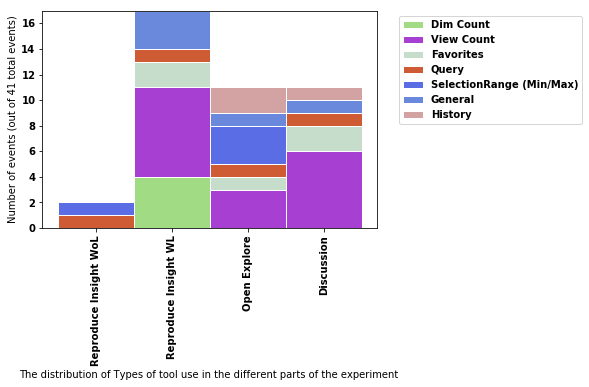

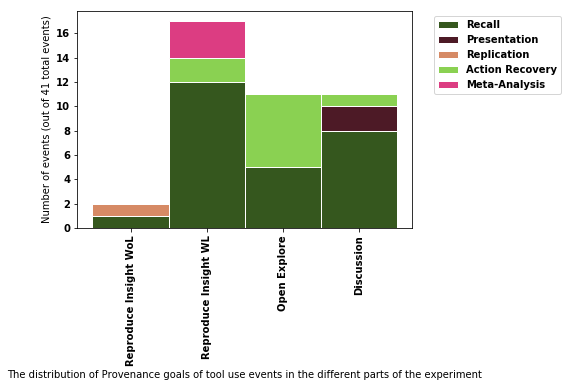

12 events or  70.59 % of  Reproduce Insight WL 17 total events is  Recall
2 events or  18.18 % of  Discussion 11 total events is  Presentation
8 events or  72.73 % of  Discussion 11 total events is  Recall
1 events or  50.00 % of  Reproduce Insight WoL 2 total events is  Replication
2 events or  11.76 % of  Reproduce Insight WL 17 total events is  Action Recovery
5 events or  45.45 % of  Open Explore 11 total events is  Recall
1 events or  50.00 % of  Reproduce Insight WoL 2 total events is  Recall
3 events or  17.65 % of  Reproduce Insight WL 17 total events is  Meta-Analysis
6 events or  54.55 % of  Open Explore 11 total events is  Action Recovery
1 events or  9.09 % of  Discussion 11 total events is  Action Recovery


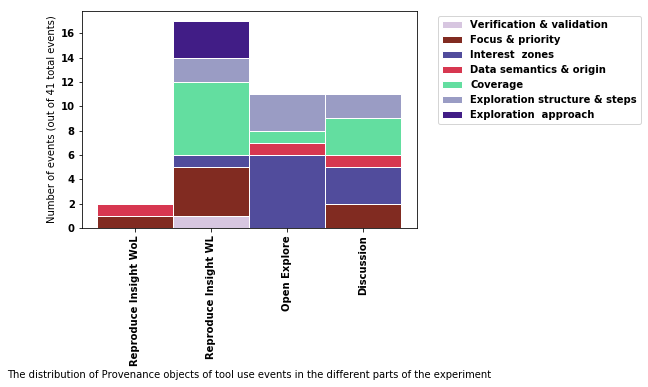

In [44]:
color_bargraph(Exp_Part, Tool, "The distribution of Types of tool use in the different parts of the experiment ",print_false, order_ExpPart ) # 5.3.2  Provenance at different exploration parts 
color_bargraph(Exp_Part, Ragan, "The distribution of Provenance goals of tool use events in the different parts of the experiment",print_true, order_ExpPart) # 5.3.2  Provenance at different exploration parts
color_bargraph(Exp_Part, Code_P1, "The distribution of Provenance objects of tool use events in the different parts of the experiment",print_false, order_ExpPart) # 5.3.2  Provenance at different exploration parts 


# Opportunities for provenance visualization (paper section 5.4) <a class="anchor" id="Opportunities_for_provenance_visualization"></a>


* [Back to the TOC](#TOC)

In [28]:
## 0 = must NOT include
## 1 = must include
## 2 = we dont care either way

provenance_filter = 2
TradeOff_filter = 0
Opportunities_filter = 1
ToolUse_filter = 2


Use_Case ,Opportunity,Provenance ,Observed,Ragan,Tool ,Code_P1 ,Code_P2 ,Exp_Part,ids  = filter( provenance_filter,TradeOff_filter,Opportunities_filter,ToolUse_filter, Use_Case ,Opportunity,Provenance ,Observed,Ragan,Tool ,Code_P1 ,Code_P2 ,Exp_Part,ids )

D_Provenance 6 events or 6.59 % of total  91  events
A_Provenance 85 events or 93.41 % of total  91  events


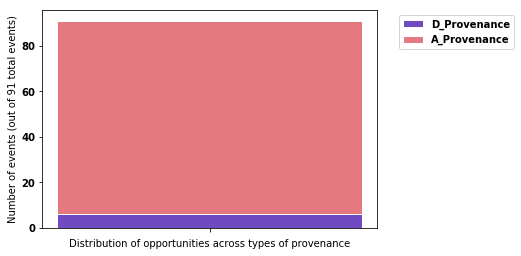

In [29]:
one_bar_color_bargraph(Provenance,"Distribution of opportunities across types of provenance",print_true)

CS-eco 29 events or 31.87 % of total  91  events
CS-ml 27 events or 29.67 % of total  91  events
CS-w 35 events or 38.46 % of total  91  events


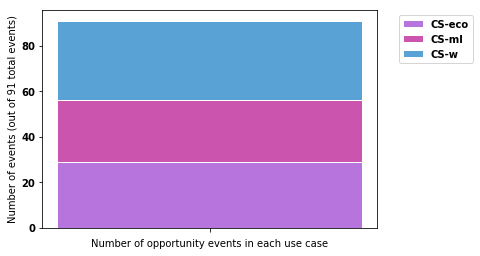

Reproduce Insight WoL 29 events or 31.87 % of total  91  events
Reproduce Insight WL 25 events or 27.47 % of total  91  events
Open Explore 22 events or 24.18 % of total  91  events
Discussion 15 events or 16.48 % of total  91  events


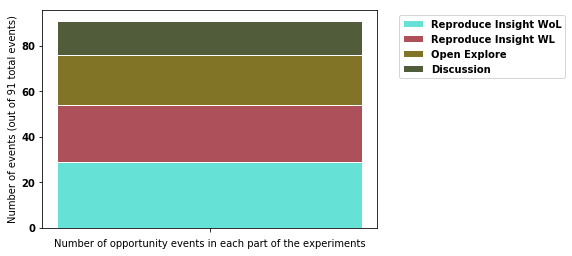

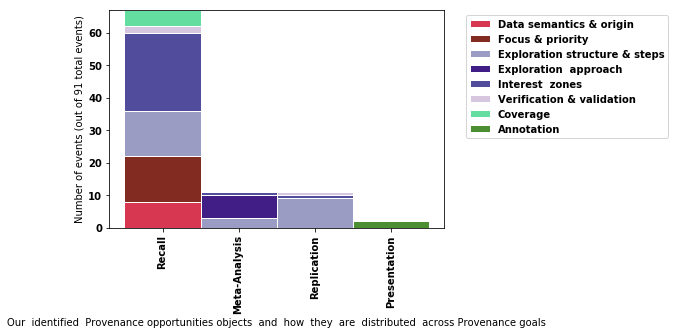

8 events or  11.94 % of  Recall 67 total events is  Data semantics & origin
14 events or  20.90 % of  Recall 67 total events is  Focus & priority
14 events or  20.90 % of  Recall 67 total events is  Exploration structure & steps
7 events or  63.64 % of  Meta-Analysis 11 total events is  Exploration  approach
24 events or  35.82 % of  Recall 67 total events is  Interest  zones
2 events or  2.99 % of  Recall 67 total events is  Verification & validation
9 events or  81.82 % of  Replication 11 total events is  Exploration structure & steps
1 events or  9.09 % of  Replication 11 total events is  Interest  zones
5 events or  7.46 % of  Recall 67 total events is  Coverage
3 events or  27.27 % of  Meta-Analysis 11 total events is  Exploration structure & steps
1 events or  9.09 % of  Meta-Analysis 11 total events is  Interest  zones
2 events or  100.00 % of  Presentation 2 total events is  Annotation
1 events or  9.09 % of  Replication 11 total events is  Verification & validation
Data semant

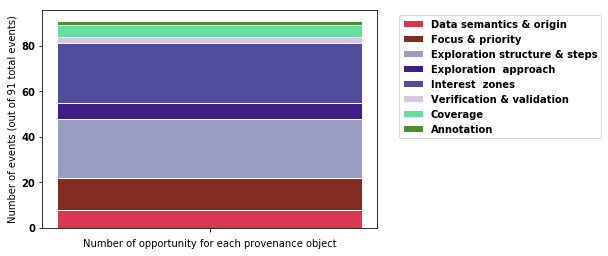

In [30]:
one_bar_color_bargraph(Use_Case,"Number of opportunity events in each use case",print_true)# In Paper 5.4 Opportunities for provenance visualization 
one_bar_color_bargraph(Exp_Part,"Number of opportunity events in each part of the experiments",print_true)# In Paper 5.4 Opportunities for provenance visualization 

color_bargraph(Ragan, Code_P1,"Our  identified  Provenance opportunities objects  and  how  they  are  distributed  across Provenance goals",print_true, order_none) # In Paper 5.4.1 => 5.4.4 Recall, Meta-Analysis, Presentation & Collaboration opportunities
one_bar_color_bargraph(Code_P1,"Number of opportunity for each provenance object",print_true)#Extra